In [40]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [41]:
dir_baseline = '../checkpoints/result/'
dir_R_nK = '../checkpoints/test3/'
dir_R_sK = '../checkpoints/result_density_rgbW/'
dir_A_sK = '../checkpoints/result_de/'
dir_A_sD = '../checkpoints/result_dd/'
# datasets = [ 'HoneyBee', 'Jockey']
# datasets = ['Mix', 'Jockey']
datasets = ['Beauty','HoneyBee','Jockey']
methods = {
    # "Baseline (Static K-frame selection)": dir_baseline,
    # "Removal control (No K-frame selection)": dir_R_nK,
    "Removal control (Static K-frame selection)": dir_R_sK,
    "Adaptive control (Static K-frame selection)": dir_A_sK,
    # "Adaptive control (Scene Detector)": dir_A_sD,
}
data = {dataset: {method: [] for method in methods} for dataset in datasets}
data_K_frames = {dataset: [] for dataset in datasets}

In [42]:
for method_name, dir_path in methods.items():
    for dataset in datasets:
        file_path = os.path.join(dir_path, dataset, "train.txt")
        with open(file_path, 'r') as file:
            lines = file.readlines()
            # 跳过最后一行的平均值，只读帧数据
            for line in lines[:-1]:
                match = re.search(r"Frame_\d+:.*MS-SSIM:([\d.]+)", line)
                if match:
                    psnr = float(match.group(1))
                    data[dataset][method_name].append(psnr)
# for dataset in datasets:
#     file_path = os.path.join(dir_path, dataset, "K_frames.txt")
#     with open(file_path, "r") as f:
#         data_K_frames[dataset] = [int(line.strip()) for line in f.readlines()]

[]


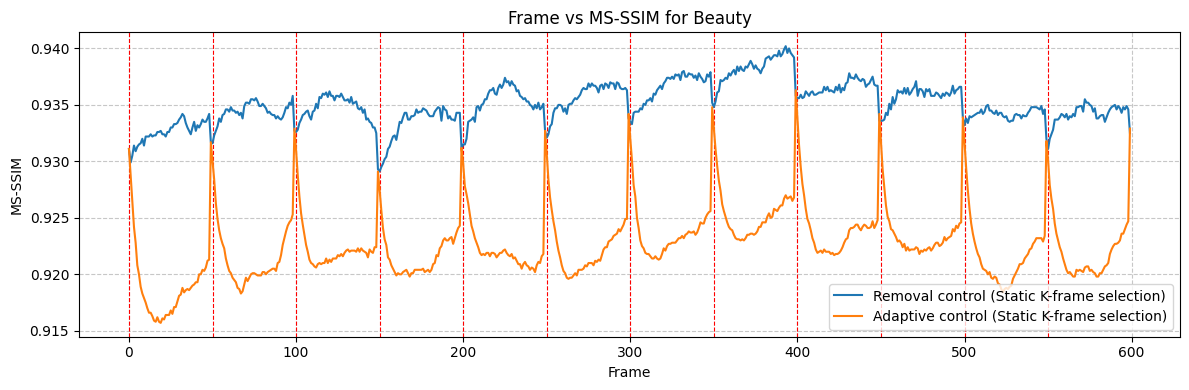

[]


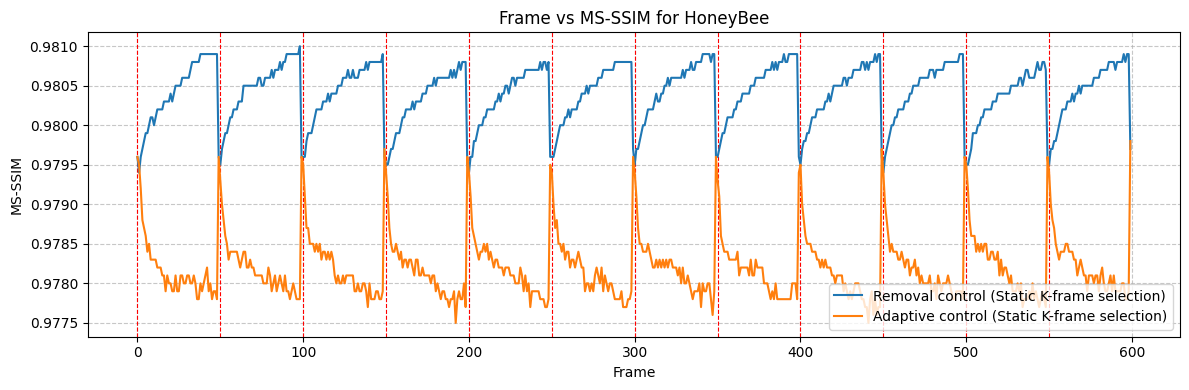

[]


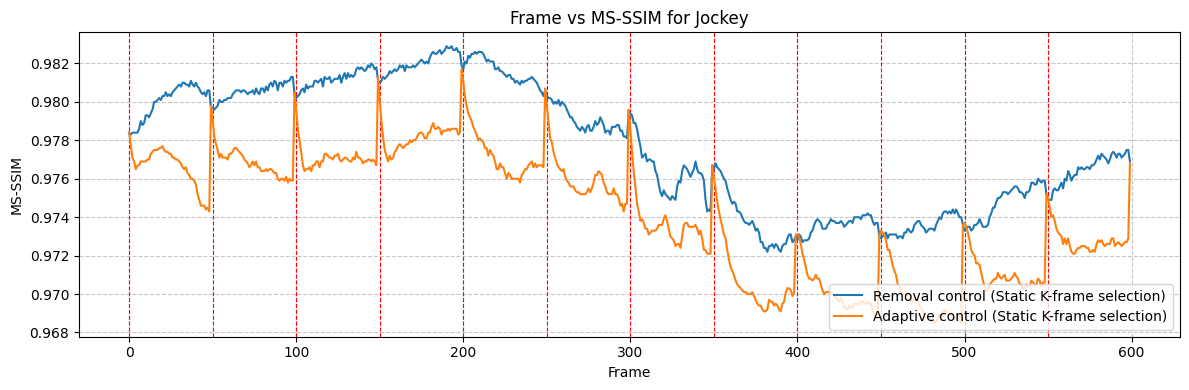

In [43]:
for dataset in datasets:
    plt.figure(figsize=(12, 4))
    if dataset =='Mix':
        lenth=270
    else:
        lenth=600
    for x in range(0, lenth):
        if x in data_K_frames[dataset]:
            plt.axvline(x=x, color='yellow', linestyle='--', linewidth=0.8)
    # 添加每隔50帧的红色竖线
    for x in range(0, lenth, 50):
        plt.axvline(x=x, color='red', linestyle='--', linewidth=0.8)
    for method_name, psnr_values in data[dataset].items():
        plt.plot(psnr_values, label=method_name, linewidth=1.5)
    print(data_K_frames[dataset])

    
    plt.xlabel('Frame')
    plt.ylabel('MS-SSIM')
    plt.title(f'Frame vs MS-SSIM for {dataset}')
    plt.legend(loc='lower right')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

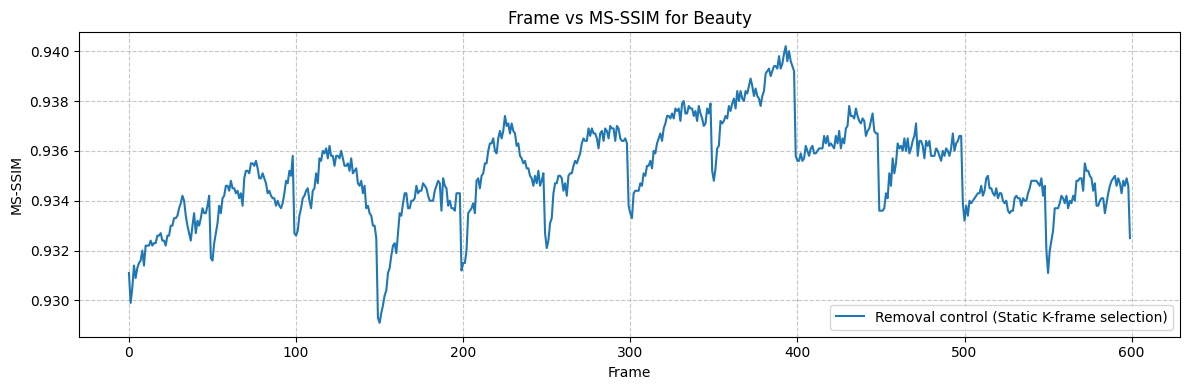

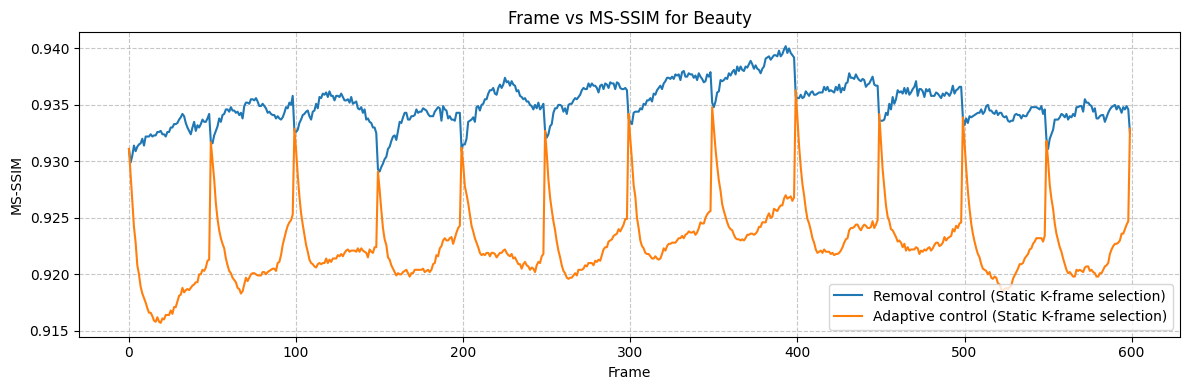

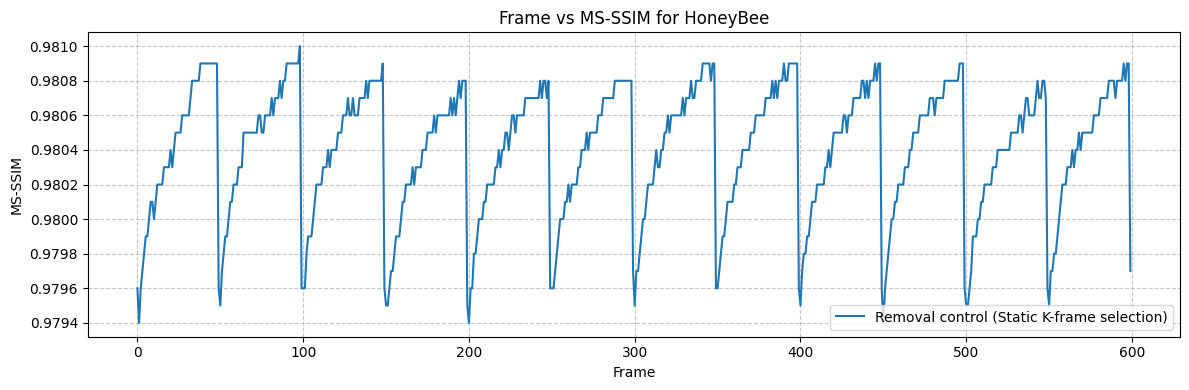

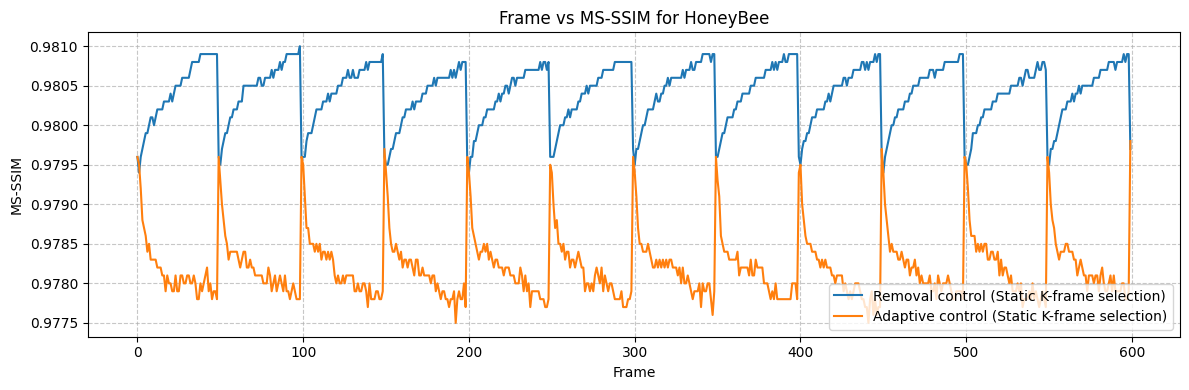

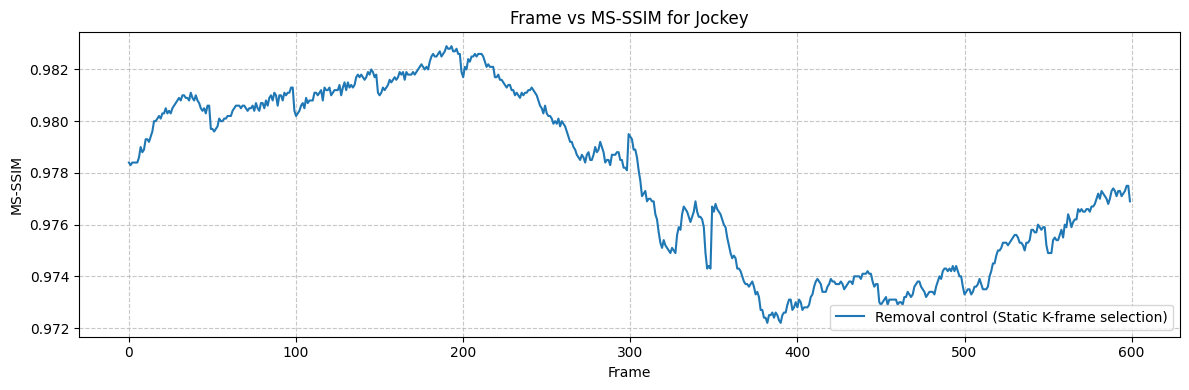

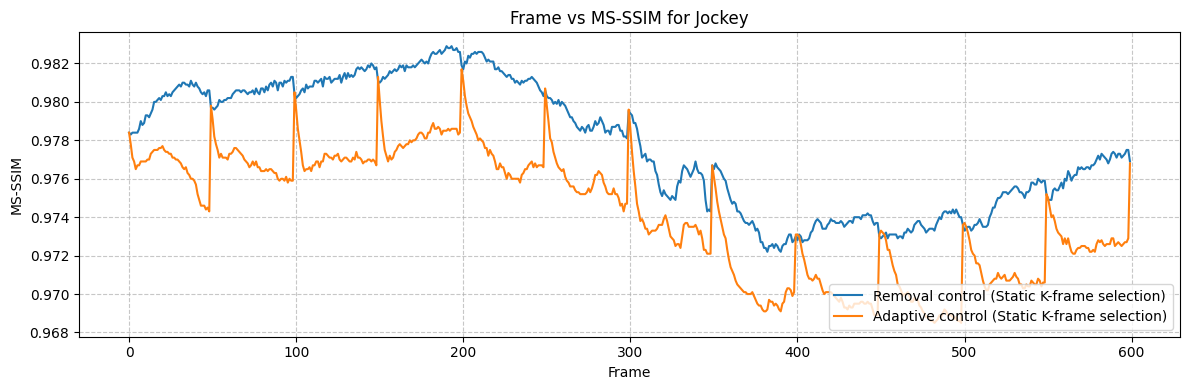

In [44]:
import matplotlib.pyplot as plt

# 假设 datasets 和 data 已经定义
for dataset in datasets:
    # # 判断不同数据集的长度
    # if dataset == 'Mix':
    #     length = 270
    # else:
    #     length = 600

    # 获取当前数据集的所有方法
    methods = list(data[dataset].items())
    
    # 循环绘制每个方法的图
    for n, (method_name, psnr_values) in enumerate(methods):
        plt.figure(figsize=(12, 4))  # 每次绘制新的图形
        
        # 绘制前n+1个方法的曲线
        for i in range(n + 1):
            prev_method_name, prev_psnr_values = methods[i]
            plt.plot(prev_psnr_values, label=prev_method_name, linewidth=1.5)
        
        # # 绘制每隔50帧的红色竖线
        # for x in range(0, length, 50):
        #     plt.axvline(x=x, color='red', linestyle='--', linewidth=0.8)

        # # 如果有K帧的数据，绘制黄色竖线
        # if dataset in data_K_frames:
        #     for x in data_K_frames[dataset]:
        #         plt.axvline(x=x, color='yellow', linestyle='--', linewidth=0.8)

        # 设置图表标题和标签
        plt.xlabel('Frame')
        plt.ylabel('MS-SSIM')
        plt.title(f'Frame vs MS-SSIM for {dataset}')
        
        # 添加图例
        plt.legend(loc='lower right')
        plt.grid(True, linestyle='--', alpha=0.7)

        # 确保图形布局不会重叠
        plt.tight_layout()
        
        # 显示当前图形
        plt.show()


In [45]:
dir_baseline = '../checkpoints/result/'
dir_R_nK = '../checkpoints/test3/'
dir_R_sK = '../checkpoints/result_density_rgbW/'
dir_A_sK = '../checkpoints/result_de/'
dir_A_sD = '../checkpoints/result_dd/'
# datasets = [ 'HoneyBee', 'Jockey']
# datasets = ['Mix', 'Jockey']
datasets = ['Beauty','HoneyBee','Jockey']
methods = {
    # "Baseline (Static K-frame selection)": dir_baseline,
    # "Removal control (No K-frame selection)": dir_R_nK,
    "Removal control (Static K-frame selection)": dir_R_sK,
    "Adaptive control (Static K-frame selection)": dir_A_sK,
    # "Adaptive control (Scene Detector)": dir_A_sD,
}
data = {dataset: {method: [] for method in methods} for dataset in datasets}
data_K_frames = {dataset: [] for dataset in datasets}
for method_name, dir_path in methods.items():
    for dataset in datasets:
        file_path = os.path.join(dir_path, dataset, "train.txt")
        with open(file_path, 'r') as file:
            lines = file.readlines()
            # 跳过最后一行的平均值，只读帧数据
            for line in lines[:-1]:
                match = re.search(r"Frame_\d+:.*PSNR:([\d.]+)", line)
                if match:
                    psnr = float(match.group(1))
                    data[dataset][method_name].append(psnr)
# for dataset in datasets:
#     file_path = os.path.join(dir_path, dataset, "K_frames.txt")
#     with open(file_path, "r") as f:
#         data_K_frames[dataset] = [int(line.strip()) for line in f.readlines()]

[]


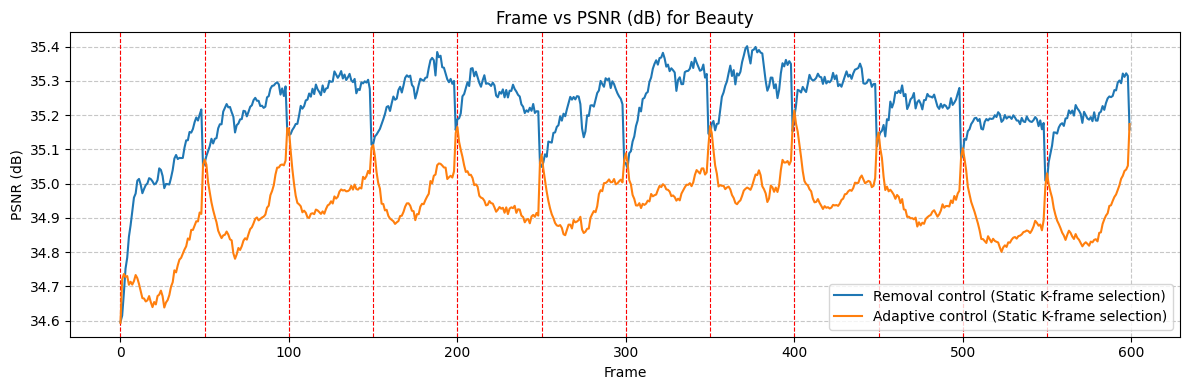

[]


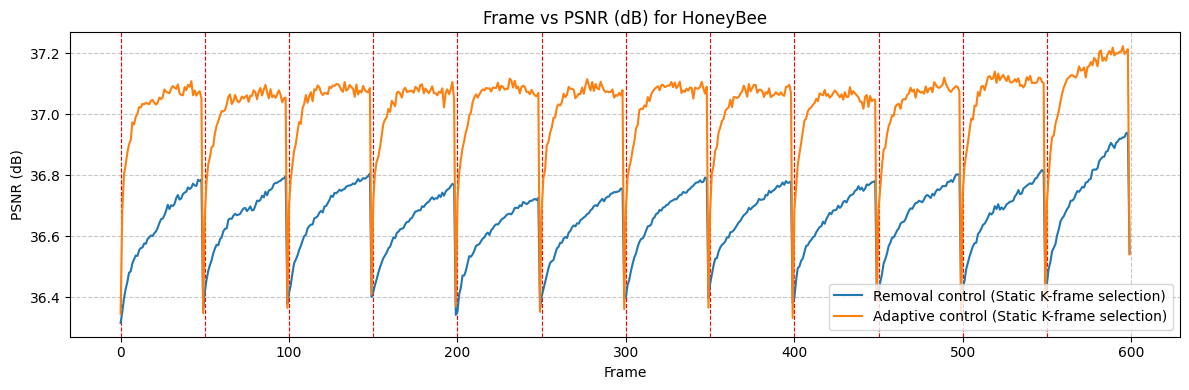

[]


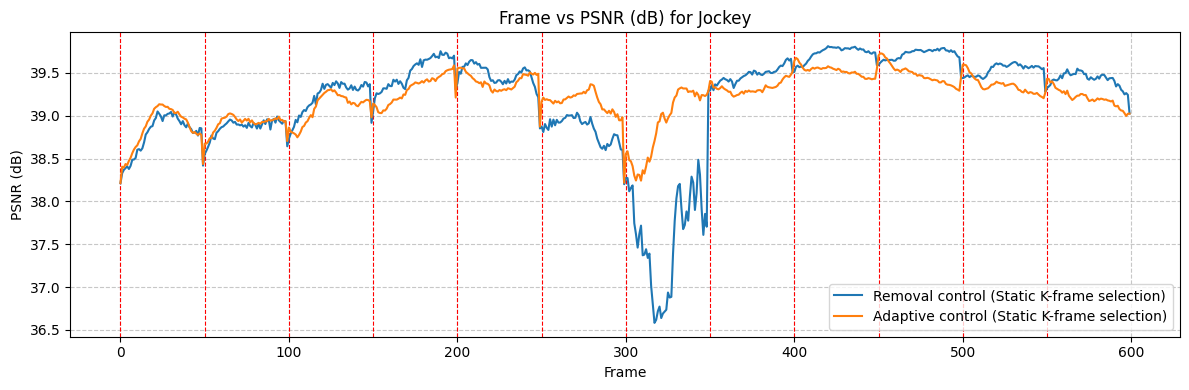

In [46]:
for dataset in datasets:
    plt.figure(figsize=(12, 4))
    if dataset =='Mix':
        lenth=270
    else:
        lenth=600
    for x in range(0, lenth):
        if x in data_K_frames[dataset]:
            plt.axvline(x=x, color='yellow', linestyle='--', linewidth=0.8)
    # 添加每隔50帧的红色竖线
    for x in range(0, lenth, 50):
        plt.axvline(x=x, color='red', linestyle='--', linewidth=0.8)
    for method_name, psnr_values in data[dataset].items():
        plt.plot(psnr_values, label=method_name, linewidth=1.5)
    print(data_K_frames[dataset])

    
    plt.xlabel('Frame')
    plt.ylabel('PSNR (dB)')
    plt.title(f'Frame vs PSNR (dB) for {dataset}')
    plt.legend(loc='lower right')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

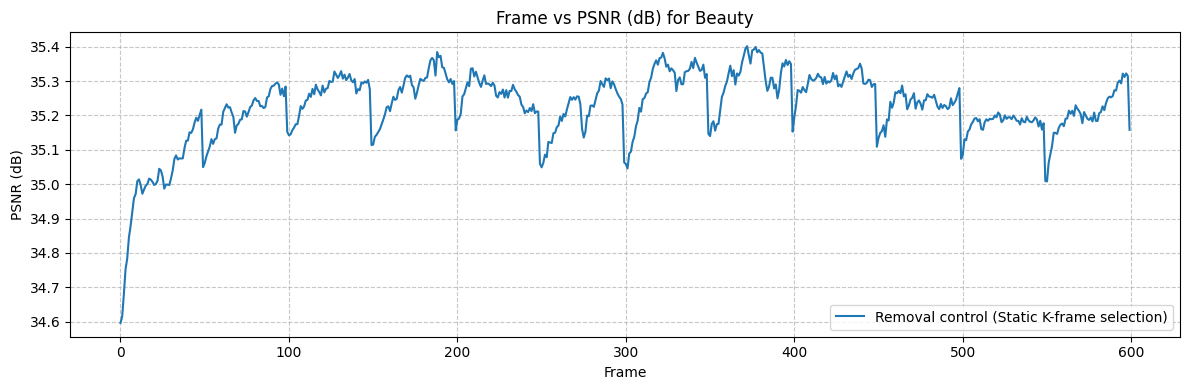

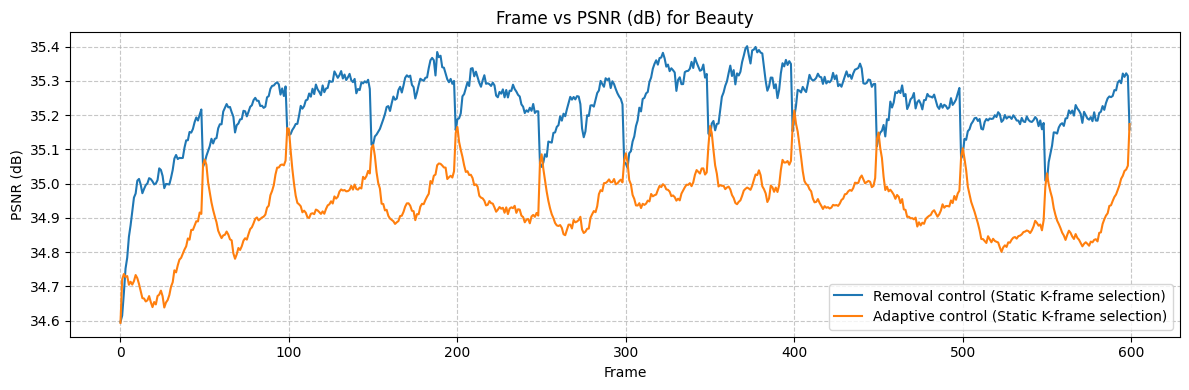

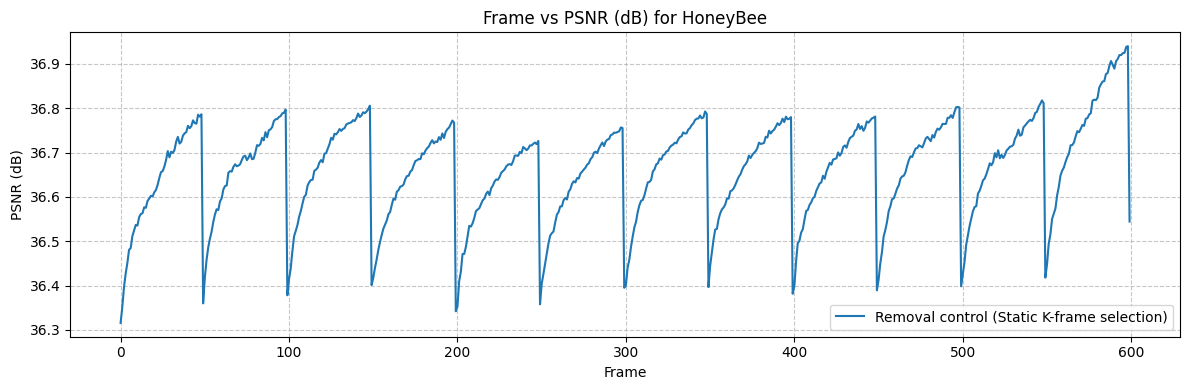

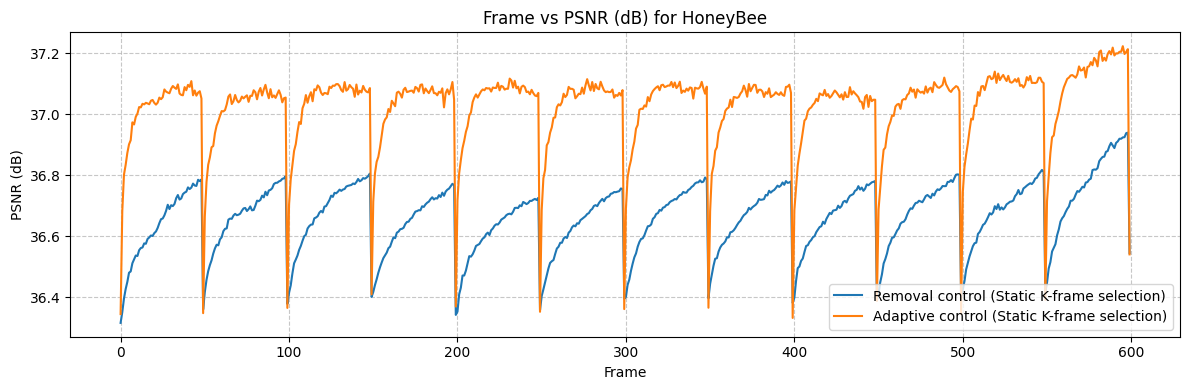

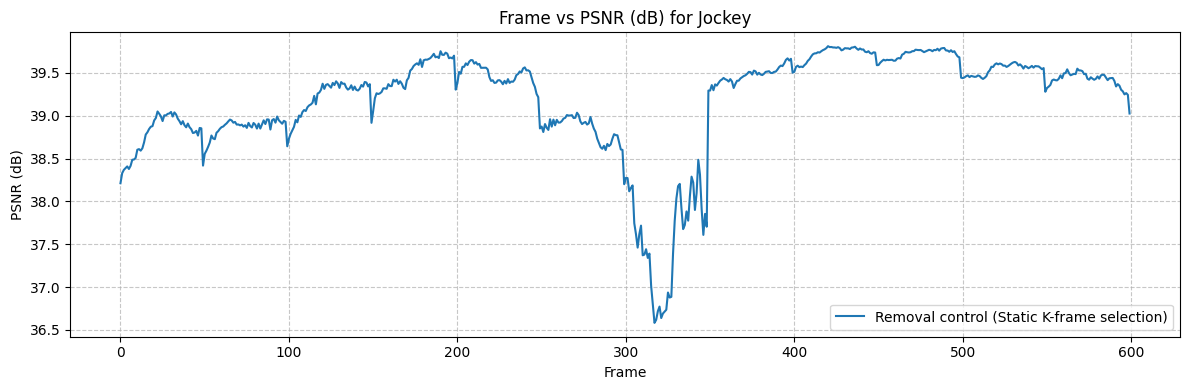

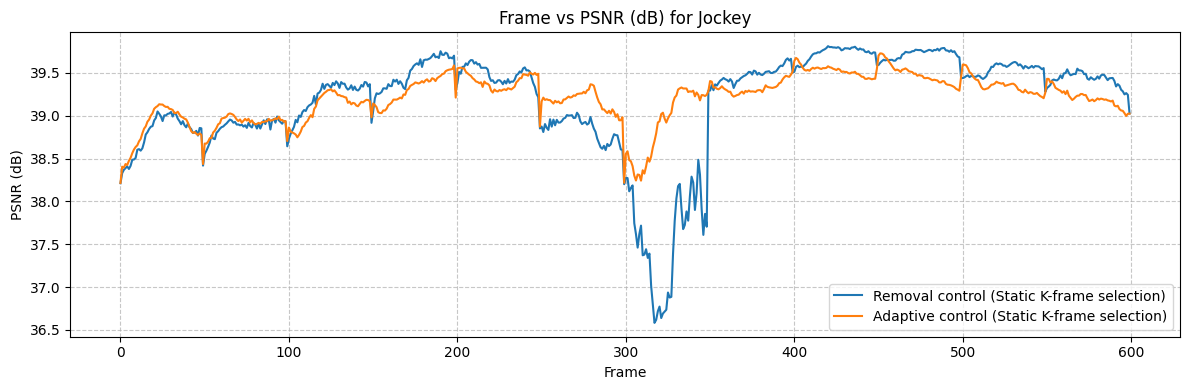

In [47]:
import matplotlib.pyplot as plt

# 假设 datasets 和 data 已经定义
for dataset in datasets:
    # # 判断不同数据集的长度
    # if dataset == 'Mix':
    #     length = 270
    # else:
    #     length = 600

    # 获取当前数据集的所有方法
    methods = list(data[dataset].items())
    
    # 循环绘制每个方法的图
    for n, (method_name, psnr_values) in enumerate(methods):
        plt.figure(figsize=(12, 4))  # 每次绘制新的图形
        
        # 绘制前n+1个方法的曲线
        for i in range(n + 1):
            prev_method_name, prev_psnr_values = methods[i]
            plt.plot(prev_psnr_values, label=prev_method_name, linewidth=1.5)
        
        # # 绘制每隔50帧的红色竖线
        # for x in range(0, length, 50):
        #     plt.axvline(x=x, color='red', linestyle='--', linewidth=0.8)

        # # 如果有K帧的数据，绘制黄色竖线
        # if dataset in data_K_frames:
        #     for x in data_K_frames[dataset]:
        #         plt.axvline(x=x, color='yellow', linestyle='--', linewidth=0.8)

        # 设置图表标题和标签
        plt.xlabel('Frame')
        plt.ylabel('PSNR (dB)')
        plt.title(f'Frame vs PSNR (dB) for {dataset}')
        
        # 添加图例
        plt.legend(loc='lower right')
        plt.grid(True, linestyle='--', alpha=0.7)

        # 确保图形布局不会重叠
        plt.tight_layout()
        
        # 显示当前图形
        plt.show()
